## Observations and Insights 

In [230]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
com_mou_stud = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
#setting Mouse ID as Index

# Display the data table for preview
com_mou_stud.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [94]:
# Checking the number of mice. 
len(com_mou_stud['Mouse ID'].value_counts())


249

In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#making a list of mouse and their Timepoints

dupli_mouse = com_mou_stud[com_mou_stud.duplicated(['Mouse ID','Timepoint'])]
dupli_id = dupli_mouse['Mouse ID'].unique()
print(dupli_id)

['g989']


In [44]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df = com_mou_stud
dup_df = dup_df.set_index('Mouse ID')
dup_mouse_ID = dup_df.loc[['g989']]
#displaying duplicate mouse ID
dup_mouse_ID.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0


In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = com_mou_stud

clean_df = clean_df.drop_duplicates(subset= ['Mouse ID','Timepoint'], keep="first")

clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [49]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].value_counts()

len(clean_df['Mouse ID'].value_counts())

249

## Summary Statistics

In [82]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
#Grouping together
grp_reg = clean_df.groupby(['Drug Regimen'])
#creating dataframe for summary table
Summry_table = pd.DataFrame(columns = ["Mean", "Median","Variance","Standard Deviation","SEM"])
#populating the summary table
Summry_table['Mean'] = grp_reg['Tumor Volume (mm3)'].mean()
Summry_table['Median'] = grp_reg['Tumor Volume (mm3)'].median()
Summry_table['Variance'] = grp_reg['Tumor Volume (mm3)'].var()
Summry_table['Standard Deviation'] = grp_reg['Tumor Volume (mm3)'].std()
Summry_table['SEM'] = grp_reg['Tumor Volume (mm3)'].sem()

Summry_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Drug Regimen')

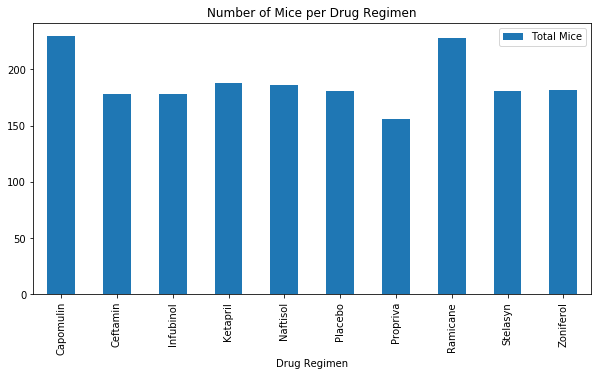

In [143]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#getting the data ready for plotting
drg_mouse = pd.DataFrame(columns = ["Total Mice"])
drg_mouse['Total Mice'] = grp_reg['Mouse ID'].count()

#plotting
drg_mouse.plot(kind="bar", figsize=(10,5))
#placing ticks
plt.title("Number of Mice per Drug Regimen")


Text(0, 0.5, 'Number of Mice')

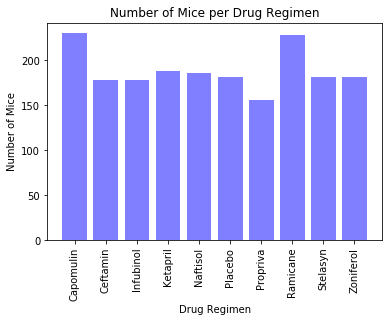

In [141]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#getting the data ready for plotting
drg_mouse = pd.DataFrame(columns = ["Total Mice"])
drg_mouse['Total Mice'] = grp_reg['Mouse ID'].count()
drg_mouse.reset_index(inplace=True)

#setting up x axia
x_axis = np.arange(len(drg_mouse))
#plotting
plt.bar(x_axis, drg_mouse['Total Mice'], color='b', alpha=0.5)
#placing ticks
x = plt.xticks(x_axis, drg_mouse['Drug Regimen'], rotation="vertical")
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb07fad5750>],
      dtype=object)

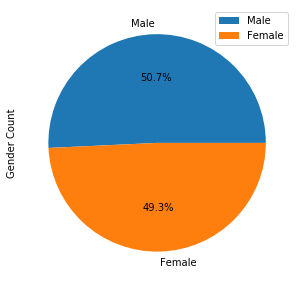

In [155]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#making the data clean to plot
gen_mouse = clean_df.groupby(['Sex'])
gen_mouse_df = pd.DataFrame(columns = ["Gender Count"])
gen_mouse_df["Gender Count"] = clean_df['Sex'].value_counts()
#plotting the data
gen_mouse_df.plot(kind="pie", subplots=True, figsize=(10,5), autopct='%1.1f%%')

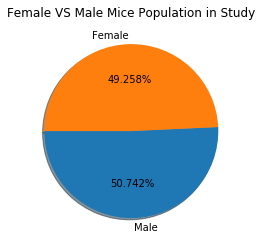

In [161]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#making the data clean to plot
gen_mouse = clean_df.groupby(['Sex'])
gen_mouse_df = pd.DataFrame(columns = ["Gender Count"])
gen_mouse_df["Gender Count"] = clean_df['Sex'].value_counts()
gen_mouse_df.reset_index(inplace=True)
#plotting the data
plt.pie(gen_mouse_df['Gender Count'], labels=gen_mouse_df['index'], autopct="%1.3f%%", shadow=True, startangle=180)
#placing ticks
plt.title("Female VS Male Mice Population in Study")
plt.show()


## Quartiles, Outliers and Boxplots

In [198]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

    #Finding all drugs required
drug_vl_tim = clean_df.loc[clean_df['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
    #removing the dups of mouse id and keeping the last row as this has the greatest timepoint
Rem_dups_df = drug_vl_tim[drug_vl_tim.duplicated(['Mouse ID'])]
Rem_dups_df = Rem_dups_df.drop_duplicates(subset= ['Mouse ID'], keep="last")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_vol = Rem_dups_df[['Drug Regimen','Tumor Volume (mm3)']]
Rem_dups_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [239]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
cap_vol = []
ram_vol = []
inf_vol = []
cef_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
cap_vol = drug_vol.loc[drug_vol['Drug Regimen']=='Capomulin']
cap_vol_num = cap_vol['Tumor Volume (mm3)']

ram_vol = drug_vol.loc[drug_vol['Drug Regimen']=='Ramicane']
ram_vol_num = ram_vol['Tumor Volume (mm3)']

inf_vol = drug_vol.loc[drug_vol['Drug Regimen']=='Infubinol']
inf_vol_num = inf_vol['Tumor Volume (mm3)']


cef_vol = drug_vol.loc[drug_vol['Drug Regimen']=='Ceftamin']
cef_vol_num = cef_vol['Tumor Volume (mm3)']


    # add subset 
cap_quantiles = cap_vol_num.quantile([.25,.5,.75])
cap_quantiles

cap_Q1 = cap_quantiles[0.25]
cap_Q3 = cap_quantiles[0.75]
cap_iqr = cap_Q3 - cap_Q1
cap_lower_bound = cap_Q1 - (1.5*cap_iqr)
cap_upper_bound = cap_Q3 + (1.5*cap_iqr)

ram_quantiles = ram_vol_num.quantile([.25,.5,.75])

ram_Q1 = ram_quantiles[0.25]
ram_Q3 = ram_quantiles[0.75]
ram_iqr = ram_Q3 - ram_Q1
ram_lower_bound = ram_Q1 - (1.5*ram_iqr)
ram_upper_bound = ram_Q3 + (1.5*ram_iqr)

inf_quantiles = inf_vol_num.quantile([.25,.5,.75])
inf_Q1 = inf_quantiles[0.25]
inf_Q3 = inf_quantiles[0.75]
inf_iqr = inf_Q3 - inf_Q1
inf_lower_bound = inf_Q1 - (1.5*inf_iqr)
inf_upper_bound = inf_Q3 + (1.5*inf_iqr)


cef_quantiles = cef_vol_num.quantile([.25,.5,.75])
cef_Q1 = cef_quantiles[0.25]
cef_Q3 = cef_quantiles[0.75]
cef_iqr = cef_Q3 - cef_Q1
cef_lower_bound = cef_Q1 - (1.5*cef_iqr)
cef_upper_bound = cef_Q3 + (1.5*cef_iqr)

 # Determine outliers using upper and lower bounds
cap_outliers = cap_vol_num.loc[(cap_vol_num < cap_lower_bound) | (cap_vol_num > cap_upper_bound)]
ram_outliers = ram_vol_num.loc[(ram_vol_num < ram_lower_bound) | (ram_vol_num > ram_upper_bound)]
inf_outliers = inf_vol_num.loc[(inf_vol_num < inf_lower_bound) | (inf_vol_num > inf_upper_bound)]
cef_outliers = cef_vol_num.loc[(cef_vol_num < cef_lower_bound) | (cef_vol_num > cef_upper_bound)]

print("Following are Capomulin outliers")
print(cap_outliers)

print("Following are Ramicane outliers")
print(ram_outliers)

print("Following are Infubinol outliers")
print(inf_outliers)

print("Following are Ceftamin outliers")
print(cef_outliers)

Following are Capomulin outliers
Series([], Name: Tumor Volume (mm3), dtype: float64)
Following are Ramicane outliers
Series([], Name: Tumor Volume (mm3), dtype: float64)
Following are Infubinol outliers
669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Following are Ceftamin outliers
Series([], Name: Tumor Volume (mm3), dtype: float64)


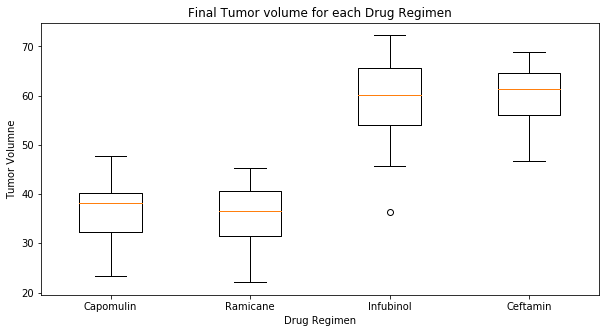

In [245]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
combined = [cap_vol_num, ram_vol_num,inf_vol_num,cef_vol_num]
plt.figure(figsize=(10,5))
plt.title('Final Tumor volume for each Drug Regimen')
plt.ylabel('Tumor Volumne')
plt.xlabel('Drug Regimen')
plt.boxplot(combined,labels = treatments)
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
